# Predicting the Sale price of Bulldozers using Machine Learning 

In this motebook, we're going to go through an example machine learning project 
with thfe goal of predicting the sale price of bulldozers.

## 1. Problem Definition 
> How well can we predict the future sale price of a bulldozer, given its characteristics and pfrevius examples of how much similar bulldozers have been sold for?

## 2. Data 
The data is downloaded from the Kaggle blueoook 

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

>Evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimjize the error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.

## 4. Features
kaggle provides data dictionary 
https://docs.google.com/spreadsheets/d/10hCe_NmgVCuCLT-0iXZRfxXJ_egdgGyOkndXRUgwHGA/edit#gid=723841180







In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import Train and validate data 
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False);

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

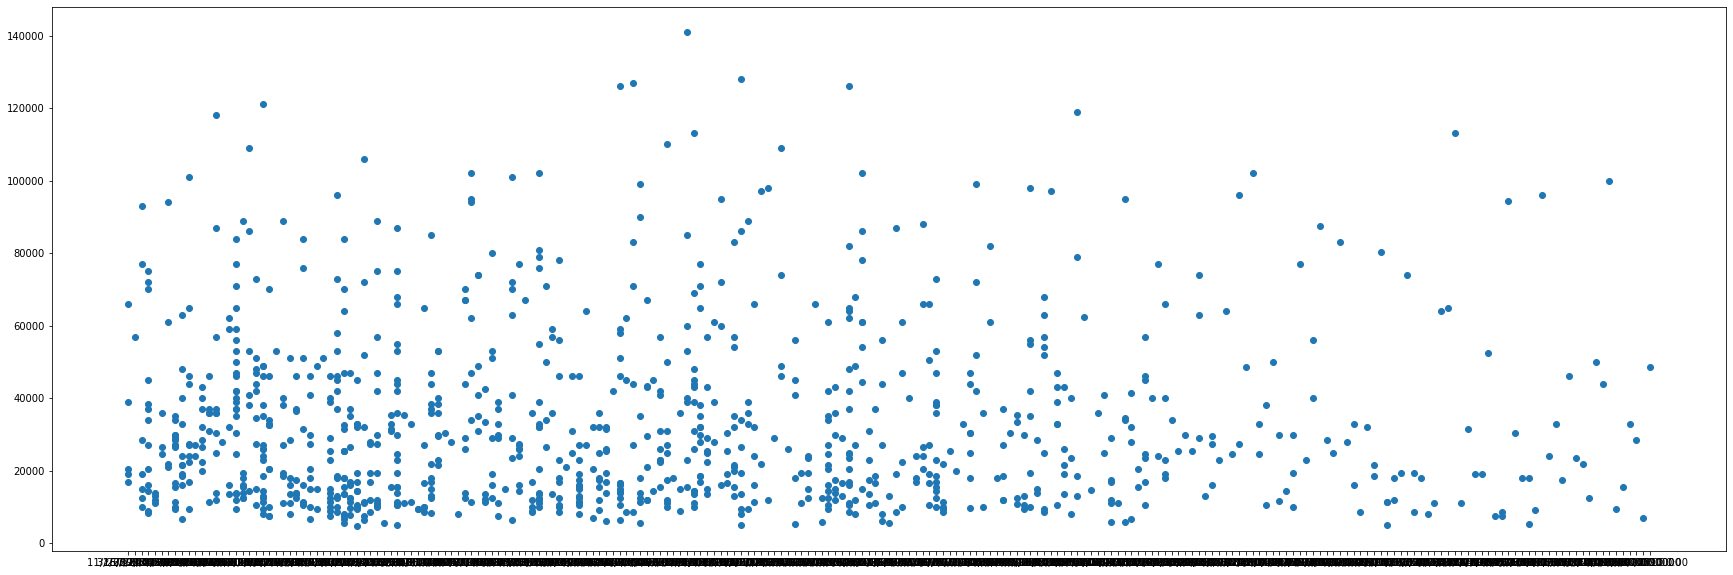

In [5]:
#visualize the data
fis, ax = plt.subplots(figsize=(30,10))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

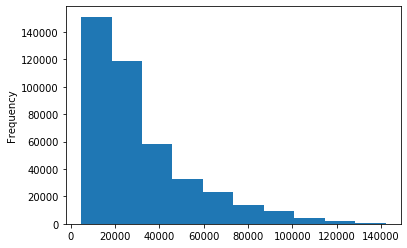

In [6]:
df['SalePrice'].plot.hist()

### Parse date
when we work with timeseries data  we need to enrich the the dtae and time component as much as possible.



In [7]:
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df['saledate'][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

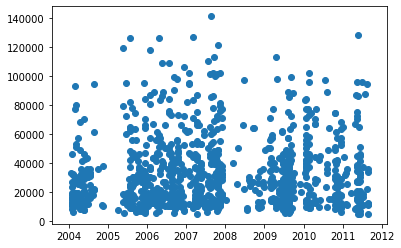

In [10]:
fig, ax =  plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [11]:
df.head(100)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1139543,25500.0,1024992,4794,121,3.0,1996,1056.0,Low,2005-12-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1139545,17500.0,273291,7014,121,3.0,2001,350.0,Low,2004-01-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1139546,64000.0,1031217,4789,121,3.0,2002,5516.0,Medium,2008-09-18,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
98,1139547,20500.0,332277,1571,121,3.0,1980,0.0,NaN,2005-11-03,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN


In [12]:
#To see every truncated column we can use transpose
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort dataframe by date
While working with TimeSeries it's a good practice to sort the dates


In [13]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)

In [14]:
df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Make the  copy of original dataframe 
As if we did something wrong with our data we can revert back

In [15]:
# Making the copy
df_tmp  = df.copy()

#### Let's do Feature Engineering i.e., enriched our data
We'll enrich our `saledate` data
Add datetime parameters for `saledate` column

In [16]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [17]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
df_tmp.drop("saledate",axis=1,inplace=True)

# Modelling
Now we've done enough EDA we can do modelling

In [19]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [20]:
#Let's build a machine learning model 
# np.random.seed(42), as we can use random_state parameter
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop('SalePrice',axis=1),df_tmp['SalePrice'])





ValueError: could not convert string to float: 'Low'

In [ ]:
df_tmp.info()

# Convert strings into categories

One way we can convert our all data into numbers using pandas categories

We can check different datatypes compatible with pandas here:
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [ ]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

In [ ]:
#Finding the columns which contains string
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [ ]:
#Convert columns which are string datatype into categories  
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [ ]:
df_tmp.info()

In [ ]:
df_tmp.state.cat.categories

In [ ]:
df_tmp.state.cat.codes

In [ ]:
df_tmp.Forks.cat.categories

Thanks to pandas Categoriesw now have a way to access all of our data in the forms of numbers

But we still have a bunch of missing data...


In [ ]:
#Check missing data
df_tmp.isna().sum()/len(df_tmp)*100

### Save preprocessed data


In [ ]:
df_tmp.info()


In [ ]:
#Export presprocessed data
df_tmp.to_csv('data/bluebook-for-bulldozers/train_tmp.csv',
              index=False)

In [ ]:
#Import preprocessed data
df_tmp = pd.read_csv('data/bluebook-for-bulldozers/train_tmp.csv',
                    low_memory=False)

## Fill missing values
## Identifying which are the numerical values

In [39]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
UsageBand_is_missing
fiModelDesc_is_missing
fiBaseModel_is_missing
fiSecondaryDesc_is_missing
fiModelSeries_is_missing
fiModelDescriptor_is_missing
ProductSize_is_missing
fiProductClassDesc_is_missing
state_is_missing
ProductGroup_is_missing
ProductGroupDesc_is_missing
Drive_Syste

In [40]:
#check for which numeric coulmn have null value
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [41]:
# Fill numeric rows with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column to preserve the missing column value
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            #Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [42]:
# Demonstrate why Median is more robust than Mean
hundreds = np.full((1000,),100)
hundred_billion = np.append(hundreds,1000000000)
np.mean(hundreds), np.mean(hundred_billion), np.median(hundreds), np.median(hundred_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [43]:
#Check if there any null numeric value
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [44]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                                0.0
SalePrice                              0.0
MachineID                              0.0
ModelID                                0.0
datasource                             0.0
                                      ... 
Travel_Controls_is_missing             0.0
Differential_Type_is_missing           0.0
Steering_Controls_is_missing           0.0
auctioneerID_is_missing                0.0
MachineHoursCurrentMeter_is_missing    0.0
Length: 103, dtype: float64

In [45]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True
Steering_Controls_is_missing,True,False,True,False,True
auctioneerID_is_missing,False,False,False,False,False


### Filling and turning categorical variables into numbers

In [46]:
# Check for columns which aren't numerical
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
        
        
        

In [47]:
# Turn Categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate whether sample had missing value or not
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes +1

In [48]:
#WHY ARE WE ADDING +1 
pd.Categorical(df_tmp['UsageBand']).codes


array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [49]:
pd.Categorical(df_tmp['UsageBand']).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [50]:
#Let's check is there now anycategorical value left missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content):
            print(label)

In [51]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True
Steering_Controls_is_missing,True,False,True,False,True
auctioneerID_is_missing,False,False,False,False,False


In [52]:
df_tmp.isna().sum()

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
                                      ..
Travel_Controls_is_missing             0
Differential_Type_is_missing           0
Steering_Controls_is_missing           0
auctioneerID_is_missing                0
MachineHoursCurrentMeter_is_missing    0
Length: 103, dtype: int64

In [53]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to MachineHoursCurrentMeter_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [71]:
%%time
# Let's instantiate the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42,n_jobs=-1)
model.fit(df_tmp.drop('SalePrice', axis=1),df_tmp['SalePrice'])
model.score(df_tmp.drop('SalePrice', axis=1),df_tmp['SalePrice'])

KeyboardInterrupt: 

**Question:** Why does the above metric hold water(Means Reliable)?

## Splitting Data into Train/Validation Set

In [55]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [56]:
#Splitting data into Train/Validation Set
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]
len(df_val), len(df_train)

(11573, 401125)

In [57]:
#Split into X and Y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']


## Building an Evaluation Function 

In [73]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_preds, y_test):
    """
    Calculates the root mean squared log error between predictions and true Labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#Creating other evaluating metrics

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {"Train MAE" : mean_absolute_error(y_train,train_preds),
              "Valid MAE" : mean_absolute_error(y_valid,valid_preds),
              "Train RMSLE" : rmsle(train_preds,y_train),
              "Valid RMSLE" : rmsle(valid_preds,y_valid),
              "Train r2_score" : r2_score(y_train,train_preds),
              "valid r2_score" : r2_score(y_valid,valid_preds)}
    return scores

In [ ]:
#***This will take far to long.. for experimenting
# #Training the model
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)
# model.fit(X_train,y_train)

In [75]:
#we'll use max_samples to reduce the computation times

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)


In [76]:
%%time
model.fit(X_train,y_train)

Wall time: 41.1 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [81]:
show_scores(model)

{'Train MAE': 5562.095336615769,
 'Valid MAE': 7170.174067225437,
 'Train RMSLE': 0.25769905315247876,
 'Valid RMSLE': 0.29267406661390644,
 'Train r2_score': 0.8605542549153568,
 'valid r2_score': 0.8323397516293812}

### Hyperparameter tuning with RandomizedSearchCV

In [84]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForesrRegressor hyperparameter
rf_grid = { "n_estimators": np.arange(10, 100, 10),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2),
            "max_features": [0.5, 1, "sqrt", "auto"],
            "max_samples": [10000]
          }

#Instatantiated RandomSearchCV
rf_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                          param_distributions=rf_grid,
                          n_iter=2,
                          cv=5,
                          verbose=True)
    
#fit the the model
rf_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.9min finished


Wall time: 5min 11s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [85]:
#getting the best parameter
rf_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 14,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [86]:
show_scores(rf_model)

{'Train MAE': 6785.312265915987,
 'Valid MAE': 8293.47256022922,
 'Train RMSLE': 0.3018347434999019,
 'Valid RMSLE': 0.3292125722216368,
 'Train r2_score': 0.7972555318723873,
 'valid r2_score': 0.7706870446697485}

## Training the model with n_iter==100

In [87]:
%%time
#Most ideal Model hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(X_train,y_train)

Wall time: 4min 54s
Parser   : 157 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [88]:
show_scores(ideal_model)

{'Train MAE': 2958.525694860444,
 'Valid MAE': 5960.080609622619,
 'Train RMSLE': 0.14484724514847727,
 'Valid RMSLE': 0.24692180494715774,
 'Train r2_score': 0.9587093056181626,
 'valid r2_score': 0.88116816060368}

### Importing the test.csv for predictions (Kaggle Requirement)

In [92]:
test_df = pd.read_csv('data/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])

In [93]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [91]:
#Predicting on the test.csv
test_preds = ideal_model.predict(test_df)

ValueError: could not convert string to float: 'Low'

### Preprocessing the test.csv for fitting(getting the test.csv in the same format as train.csv/valid.csv)

In [96]:
def process_data(df):
    """
    Performs transformations on the data and returns transformed data
    """
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
    
    
    # Fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column to preserve the missing column value
                df[label+'_is_missing'] = pd.isnull(content)
                #Fill missing numeric values with median
                df[label] = content.fillna(content.median())
                
    # Turn Categorical variables into numbers and fill missing
    
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column to indicate whether sample had missing value or not
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes +1
            
                
    return df
    
    

In [101]:
# test_data_preds = ideal_model.predict(test_preds)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

In [104]:
# we can find the difference in the columns using sets
set(X_train.columns)-set(test_preds.columns)

{'auctioneerID_is_missing'}

In [105]:
# Manually adjust 'auctioneerID_is_missing' with "False"

In [106]:
df_test = test_preds.copy()

In [108]:
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


# Finally now our test.csv has the same features as train.csv. So let;s make predictions 

In [109]:
#make prediction on test data
test_data_preds = ideal_model.predict(df_test)

In [111]:
len(test_data_preds)

12457

WE've made our predicted data but it is not in the form kaggle is asking for :

So we'll change DataFrame as required by kaggle

In [113]:
#Formatted dataFrame
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test.SalesID
df_preds['SalesPrice'] = test_data_preds
df_preds

,SalesID,SalesPrice
0,1227829,17699.402840
1,1227844,15323.482690
2,1227847,51178.317325
3,1227848,62016.373917
4,1227863,47597.489432
...,...,...
12452,6643171,42311.831644
12453,6643173,14918.293669
12454,6643184,13646.280349
12455,6643186,18972.427923


In [114]:
# Export prediction data
df_preds.to_csv('data/Test-Prediction.csv',
                index=False)

# Feature Importance
With the help of Feature Importance we'll find out which feature seeks to be more important in the entire attributes collection

In [115]:
# Find Feature importance of our best Model
ideal_model.feature_importances_

array([3.51586239e-02, 1.97748915e-02, 4.27606681e-02, 1.90613314e-03,
       3.27463962e-03, 2.00566731e-01, 3.22413890e-03, 9.85267576e-04,
       4.18931247e-02, 4.12083250e-02, 5.85903765e-02, 5.03002146e-03,
       1.67465985e-02, 1.35160647e-01, 4.78636632e-02, 5.92562512e-03,
       6.14735201e-03, 2.85439154e-03, 2.52573440e-03, 7.88450568e-02,
       4.21322981e-04, 5.24705610e-05, 1.50466818e-03, 1.87321771e-04,
       1.60328985e-03, 2.33144276e-05, 6.08490143e-03, 4.24131965e-03,
       2.29797041e-03, 2.97001329e-04, 2.17585157e-03, 1.63181193e-03,
       3.43030065e-03, 5.21618040e-04, 2.76700679e-04, 1.11879269e-02,
       8.16204101e-04, 1.44301025e-02, 1.94922078e-03, 1.35713882e-03,
       8.54963616e-04, 8.40145068e-04, 1.17918748e-03, 5.59509850e-04,
       5.79062374e-04, 3.59684011e-04, 2.72938291e-04, 2.41085143e-03,
       8.67104315e-04, 2.33938693e-04, 1.54600792e-04, 7.38865439e-02,
       3.71810242e-03, 5.68797343e-03, 2.91434259e-03, 9.91372727e-03,
      

In [116]:
# Find Feature importance of our best Model
ideal_model.feature_importances_

102

In [124]:
# Help function for plotting the feature Importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
            
            
        
    # Plot the dataFrame
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()

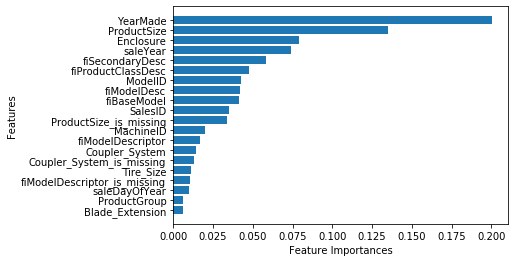

In [125]:
plot_features(X_train.columns,ideal_model.feature_importances_)